In [13]:
# x = open('normal_tissue.csv')
import pandas as pd
df = pd.DataFrame.from_csv('normal_tissue.csv')

In [4]:
set(df.Level)

{'High', 'Low', 'Medium', 'Not detected'}

In [5]:
ndf = df[df.Reliability == "Supportive"]

In [6]:
ndf[ndf.Level== "High"].head()

,Gene name,Tissue,Cell type,Level,Expression type,Reliability
Gene,,,,,,
ENSG00000001084,GCLC,duodenum,glandular cells,High,APE,Supportive
ENSG00000001084,GCLC,endometrium 2,glandular cells,High,APE,Supportive
ENSG00000001084,GCLC,fallopian tube,glandular cells,High,APE,Supportive
ENSG00000001084,GCLC,gallbladder,glandular cells,High,APE,Supportive
ENSG00000001084,GCLC,kidney,cells in tubules,High,APE,Supportive


## Staph data
http://users-birc.au.dk/cstorm/courses/MLiB_f14/project1.html

In [9]:
import requests

In [6]:
staph_url = ["http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/genome1.fa",
            "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/genome2.fa",
           "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/genome3.fa"]
staph_annot = ["http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/annotation1.fa",
              "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/annotation2.fa"
              "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/annotation3.fa"]

In [7]:
def load_file(url,genome=True):
    """input: url for genome, 
    output: pulled data without header and as a single txt string"""
    data = ''.join(requests.get(url).text.split("\n")[1::])
    return data

def segment_genome(data_string,split_size):
    """input: genome data string (data_string) and then size we should split the data (split_size)
    output: array split by specified split_size"""
    chunks = len(data_string)
    data = [data_string[i:i+split_size] for i in range(0,chunks,split_size)]
    return data

### neural network that predicts which sub-strings of the genomes are coding and which are not.

#### Segment the genomes into windows of sizes 50, 100 and 200 characters.

In [10]:
data = load_file(staph_url[0])
seg_100 = segment_genome(data,100)

#### For each window, assign the classification given by the most frequent annotation in the window.

In [11]:
data = load_file(staph_annot[0])
seg_50_an = segment_genome(data,50)

In [12]:
seg_50_an = segment_genome(data,50)

In [13]:
def gene_label(annotation, min_gene=10):
    """Input: annotation
    ouput: the label array for data (true if C or R else false for > 50% of line)"""
    size = len(annotation[0])
    print(size)
    label = [True if len(line.strip("C")) < size/2 or len(line.strip("R")) < size/2 else False 
             for line in annotation]
#     label = [0 if len(line.strip("C")) < size/2 or len(line.strip("R")) < size/2 else 1 
#          for line in annotation]
    return label

def gene_label_dir(annotation,direction="C"):
    """Input: annotation and direction is C (forward) unless specified as R (reverse)
    ouput: the label array for data"""
    size = len(annotation[0])
    label = [True if len(line.strip(direction)) < size/2 else False 
             for line in annotation]
    return label

In [14]:
gene_df = pd.DataFrame({"label":df.gene,"sequence": seg_50})

NameError: name 'pd' is not defined

In [ ]:
gene_df.head()

In [ ]:
gene_df['label'].value_counts()

In [ ]:
list(gene_df['sequence'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'char_wb', ngram_range=(1,3), min_df= 1)
d = vectorizer.fit_transform(list(gene_df['sequence']))

In [15]:
new_seq = ''
for j, i in enumerate(gene_df['sequence'][0]):
    if j % 3 == 0:
        new_seq = new_seq + i + ' '
    else: 
        new_seq = new_seq + i

NameError: name 'gene_df' is not defined

In [116]:
new_seq

u'T TGT TGA TAT TCT GTT TTT TCT TTT TTA GTT TTC CAC ATG AAA AAT AGT T'

In [104]:
vectorizer.get_feature_names()

[u' ',
 u' a',
 u' aa',
 u' ac',
 u' ag',
 u' at',
 u' c',
 u' ca',
 u' cc',
 u' cg',
 u' ct',
 u' g',
 u' ga',
 u' gc',
 u' gg',
 u' gt',
 u' t',
 u' ta',
 u' tc',
 u' tg',
 u' tt',
 u'a',
 u'a ',
 u'aa',
 u'aa ',
 u'aaa',
 u'aac',
 u'aag',
 u'aat',
 u'ac',
 u'ac ',
 u'aca',
 u'acc',
 u'acg',
 u'act',
 u'ag',
 u'ag ',
 u'aga',
 u'agc',
 u'agg',
 u'agt',
 u'at',
 u'at ',
 u'ata',
 u'atc',
 u'atg',
 u'att',
 u'c',
 u'c ',
 u'ca',
 u'ca ',
 u'caa',
 u'cac',
 u'cag',
 u'cat',
 u'cc',
 u'cc ',
 u'cca',
 u'ccc',
 u'ccg',
 u'cct',
 u'cg',
 u'cg ',
 u'cga',
 u'cgc',
 u'cgg',
 u'cgt',
 u'ct',
 u'ct ',
 u'cta',
 u'ctc',
 u'ctg',
 u'ctt',
 u'g',
 u'g ',
 u'ga',
 u'ga ',
 u'gaa',
 u'gac',
 u'gag',
 u'gat',
 u'gc',
 u'gc ',
 u'gca',
 u'gcc',
 u'gcg',
 u'gct',
 u'gg',
 u'gg ',
 u'gga',
 u'ggc',
 u'ggg',
 u'ggt',
 u'gt',
 u'gt ',
 u'gta',
 u'gtc',
 u'gtg',
 u'gtt',
 u't',
 u't ',
 u'ta',
 u'ta ',
 u'taa',
 u'tac',
 u'tag',
 u'tat',
 u'tc',
 u'tc ',
 u'tca',
 u'tcc',
 u'tcg',
 u'tct',
 u'tg',
 u'tg '

In [ ]:
print_top_words(d,)

In [ ]:
d.get

In [108]:
d.toarray()

array([[ 2,  0,  0, ...,  3,  2, 10],
       [ 2,  0,  0, ...,  1,  1,  2],
       [ 2,  1,  1, ...,  1,  1,  3],
       ..., 
       [ 2,  0,  0, ...,  1,  2,  1],
       [ 2,  1,  0, ...,  2,  0,  3],
       [ 2,  0,  0, ...,  0,  0,  0]])

In [8]:
## Feature1: nucleotide frequence

In [9]:
def nucleotide_frequency(seq):
    '''Count the occurrences of characters in "seq".'''
    counts = {'A':0,'C':0,'G':0,'T':0}
    for c in seq:
        counts[c] +=1
    return counts

In [10]:
## splice sites
data = load_file(staph_url[0])
seg_50=segment_genome(data,50)

In [11]:
nucleotide_frequency(seg_50[0])

{'A': 11, 'C': 5, 'G': 6, 'T': 28}

In [16]:
import numpy as np
import pandas as pd
result = [[l[1] for l in list(nucleotide_frequency(seg).items())] for seg in seg_50]
t = np.array(result)
# df = pd.DataFrame({"A":result[0],"C":result[1],"G":result[2],"T":result[3]})
df = pd.DataFrame(result)
df.columns=["a","c","g","t"]
df["gene"] = gene_label(seg_50_an)

NameError: name 'seg_50' is not defined

In [13]:
df["gene"] = gene_label(seg_50_an)

50


In [14]:
type(df.gene[0])


numpy.bool_

In [74]:
## Run several models: 
# 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report


from sklearn.learning_curve import learning_curve

from sklearn.cross_validation import train_test_split, KFold, cross_val_score
# from sklearn.cross_validation import KFold

## how to use Cross-validation
# X_train, X_test, y_train, y_test = train_test_split(
# ...     df[["a","c","g","t"]], df.gene, test_size=0.4, random_state=0)

## how to use k-fold
# kf = KFold(4, n_folds=2)
# sklearn.cross_validation.KFold(n=4, n_folds=2, shuffle=False,
#                                random_state=None)
# for train_index, test_index in kf:
# print("TRAIN:", train_index, "TEST:", test_index)
# X_train, X_test = X[train_index], X[test_index]
# y_train, y_test = y[train_index], y[test_index]


In [2]:
x = df[["a","c","g","t"]]
y = df.gene

NameError: name 'df' is not defined

In [1]:
y

NameError: name 'y' is not defined

In [74]:
algorithms = [RandomForestClassifier(), DecisionTreeClassifier(), GaussianNB(), 
              SVC(), KNeighborsClassifier(n_neighbors=6), LogisticRegression()]

for algo in algorithms:
    accuracy = cross_val_score(algo,x,y)
    print("{:s} Accuracy Score : {:f}".format(str(algo).split('(', 1)[0],accuracy.mean()))

RandomForestClassifier Accuracy Score : 0.709034
DecisionTreeClassifier Accuracy Score : 0.699668
GaussianNB Accuracy Score : 0.729898
SVC Accuracy Score : 0.731329
KNeighborsClassifier Accuracy Score : 0.665767
LogisticRegression Accuracy Score : 0.730681


In [76]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print classification_report(y_test, gnb.predict(X_test))

             precision    recall  f1-score   support

      False       0.52      0.10      0.17      3270
       True       0.75      0.97      0.84      8957

avg / total       0.69      0.73      0.66     12227



In [75]:
print classification_report(y_test, lg.predict(X_test))

             precision    recall  f1-score   support

      False       0.83      0.01      0.03      3270
       True       0.74      1.00      0.85      8957

avg / total       0.76      0.74      0.63     12227



In [23]:
## confusion matrix

## logistic regression

In [ ]:
LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                   fit_intercept=True, intercept_scaling=1, class_weight=None, 
                   random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                   verbose=0, warm_start=False, n_jobs=1)
fit_transform(X, y=None, **fit_params)
get_params(deep=True)
predict(X)
score(X, y, sample_weight=None)

In [20]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

logistic = linear_model.LogisticRegression()

In [18]:
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [25]:
X_digits.shape

(1797, 64)

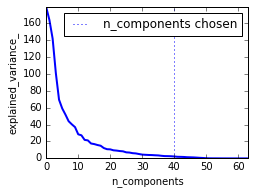

In [23]:
###############################################################################
# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
###############################################################################
# Prediction

n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [63]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [64]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf = clf.fit(X_train, y_train)

In [65]:
res = clf.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, list(res))

array([[  44, 3226],
       [   9, 8948]])

In [67]:
c = pd.DataFrame(y_test)
c["r"] = list(res)

In [71]:
len(y[y==True])

26993

In [20]:
df.head()

,a,c,g,t,gene
0,11,5,28,6,False
1,14,10,13,13,False
2,19,8,16,7,False
3,17,6,17,10,False
4,23,8,11,8,False


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit_transform()

In [26]:
len(df[df.gene == False])

10056

In [25]:
len(df[df.gene == True])

26993

In [64]:
t = np.array(result)
np.asarray(t).T.tolist()

# list(map(list,map(None,*t)))

[[6, 11, 5, 28],
 [13, 14, 10, 13],
 [19, 7, 8, 16],
 [17, 10, 6, 17],
 [23, 8, 8, 11],
 [12, 16, 7, 15],
 [14, 9, 8, 19],
 [20, 8, 6, 16],
 [14, 8, 7, 21],
 [17, 9, 7, 17],
 [5, 21, 14, 10],
 [5, 18, 7, 20],
 [14, 14, 8, 14],
 [13, 7, 11, 19],
 [6, 20, 6, 18],
 [20, 6, 8, 16],
 [8, 17, 8, 17],
 [5, 18, 7, 20],
 [16, 7, 11, 16],
 [22, 5, 13, 10],
 [17, 10, 5, 18],
 [8, 16, 11, 15],
 [19, 4, 7, 20],
 [12, 15, 6, 17],
 [9, 16, 7, 18],
 [17, 12, 12, 9],
 [17, 10, 9, 14],
 [6, 22, 8, 14],
 [19, 11, 8, 12],
 [18, 10, 9, 13],
 [22, 8, 11, 9],
 [7, 29, 5, 9],
 [16, 6, 8, 20],
 [6, 14, 11, 19],
 [19, 4, 7, 20],
 [18, 3, 9, 20],
 [4, 18, 10, 18],
 [18, 9, 10, 13],
 [18, 8, 7, 17],
 [13, 6, 6, 25],
 [23, 7, 7, 13],
 [11, 19, 5, 15],
 [7, 17, 11, 15],
 [19, 7, 8, 16],
 [17, 9, 6, 18],
 [17, 9, 10, 14],
 [15, 8, 7, 20],
 [18, 9, 6, 17],
 [10, 14, 11, 15],
 [16, 6, 12, 16],
 [10, 15, 8, 17],
 [8, 11, 15, 16],
 [15, 8, 8, 19],
 [16, 13, 6, 15],
 [8, 13, 10, 19],
 [22, 4, 8, 16],
 [10, 16, 13, 11],
 

In [41]:
len(result)

37049

In [15]:
label_1 = gene_label(seg_100_an)

## Test the net performance for different window sizes.

In [16]:
import os
from sklearn.neural_network import MLPClassifier

ImportError: cannot import name 'MLPClassifier'

In [17]:
import sklearn

In [18]:
sklearn.__version__


'0.17'

In [19]:
import tensorflow

ImportError: No module named 'tensorflow'

## Test the net performance as a function of the number of hidden nodes.

## Test the performance both on the data you have fitted the model to and on test data you did not fit the model to (one of the other genomes).

In [79]:
## Fraction of correct classifications 
 # (the fraction of coding windows you classify as coding and the of non-coding you classify as coding).
## The sensitivity: the fraction of coding windows you classify as coding.
## The specificity: the fraction of non-coding windows you classify as non-coding.

In [83]:

def read_FASTA(fname):
    '''Reads in a FASTA file and returns the sequence.'''
    lines = open(fname).readlines()[1:]
    return ''.join( line.strip() for line in lines)
    

def windows(seqfile, annfile, winsize = 100):    
    '''Iterates through a FASTA sequence together with it's gene
    annotation, providing each window together with the annotation
    window.'''
    
    seq = read_FASTA(seqfile)
    ann = read_FASTA(annfile)
    
    assert len(seq) == len(ann)
    
    for i in xrange( len(seq) / winsize ):
        yield seq[i*winsize:(i+1)*winsize], ann[i*winsize:(i+1)*winsize]

    # The last part of the sequence isn't a full window, but we still need it
    yield seq[(i+1)*winsize:], ann[(i+1)*winsize:]

def char_count(seq):
    '''Count the occurrences of characters in "seq".'''
    counts = dict()
    for c in seq:
        try:
            counts[c] +=1
        except KeyError:
            counts[c] = 1
    return counts

def counts_to_freqs(counts):
    '''Normalize counts into frequencies.'''
    n = sum(counts.values())
    freqs = dict( (k,float(v)/n) for k,v in counts.items() )
    return freqs

print('A C G T coding')
for seqwin,annwin in windows('genome1.fa','annotation1.fa'):
    seq_freqs = counts_to_freqs(char_count(seqwin))
    ann_freqs = counts_to_freqs(char_count(annwin))
    
    # set the class to be the majority in the annotation
    category = max( (v,k) for k,v in ann_freqs.items() )[1]
        
    for nuc in 'ACGT':
        print(seq_freqs[nuc])
    if category in 'RC':
        print('TRUE')
    else:
        print('FALSE')

    

A C G T coding


FileNotFoundError: [Errno 2] No such file or directory: 'genome1.fa'